In [62]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('staged-task')
jovian.set_colab_id('1vIisLGtwCZXVFTgEVFnaZNz4sI9qD4tl')

# staged-task

Use the "Run" button to execute the code.

In [63]:
!pip install jovian --upgrade --quiet

In [64]:
import jovian

In [65]:
# Execute this to save new versions of the notebook
# jovian.commit(project="staged-task")

In [66]:
! pip install kaggle

In [67]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [68]:
! cp kaggle.json ~/.kaggle/

In [69]:
! chmod 600 ~/.kaggle/kaggle.json

In [70]:
!kaggle datasets download -d nikitarom/planets-dataset

planets-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
!unzip "/content/planets-dataset.zip" -d "/content/planet"

Archive:  /content/planets-dataset.zip
replace /content/planet/planet/planet/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [72]:
import numpy as np
import pandas as pd

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
%matplotlib inline
from skimage import io
from tqdm import tqdm
import cv2
import gc

In [74]:
train_csv = '/content/planet/planet/planet/train_classes.csv'
test_csv = '/content/planet/planet/planet/sample_submission.csv'

train_cls = pd.read_csv(train_csv)

test_cls= pd.read_csv(test_csv)


In [75]:
train_cls.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [76]:
test_cls.head()

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water


In [88]:
# creating unique labels
labels = set()
def splitting_tags(tags):
    for tag in tags.split():
        labels.add(tag)

#creating copy of train set
train_cls1 = train_cls.copy()
train_cls1['tags'].apply(splitting_tags)
labels = list(labels)
print(labels)

['bare_ground', 'haze', 'slash_burn', 'clear', 'primary', 'habitation', 'selective_logging', 'cloudy', 'blow_down', 'conventional_mine', 'road', 'artisinal_mine', 'blooming', 'water', 'agriculture', 'cultivation', 'partly_cloudy']


In [89]:
from collections import Counter, defaultdict
count = defaultdict(int)
for i in labels:
        count[i] += 1
count

defaultdict(int,
            {'agriculture': 1,
             'artisinal_mine': 1,
             'bare_ground': 1,
             'blooming': 1,
             'blow_down': 1,
             'clear': 1,
             'cloudy': 1,
             'conventional_mine': 1,
             'cultivation': 1,
             'habitation': 1,
             'haze': 1,
             'partly_cloudy': 1,
             'primary': 1,
             'road': 1,
             'selective_logging': 1,
             'slash_burn': 1,
             'water': 1})

In [90]:
len(train_cls1['image_name'].unique())

40479

In [91]:
# length of data frame is same as shape
train_cls1.shape[0]

40479

In [82]:
# jovian.commit(project="staged-task")

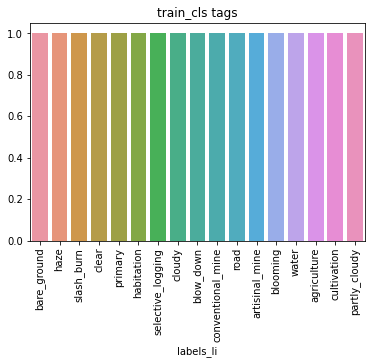

In [92]:
tags = list(count.keys()) 
y = list(count.values())
sns.barplot(x = tags, y = y);
plt.xlabel('labels');
plt.xticks(rotation = 90);
plt.title('train_cls tags');

Text(0.5, 1.0, 'Test set Tag count')

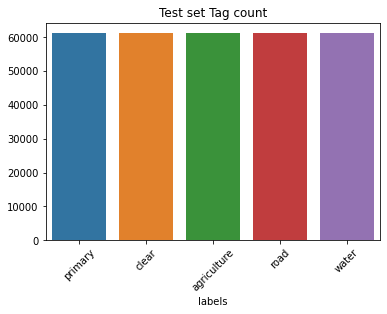

In [93]:
test_lbs = test_cls['tags'].apply(lambda x: x.split(' '))
from collections import Counter, defaultdict
test_count = defaultdict(int)
for m in test_lbs:
    for k in m:
        test_count[k] += 1

tag_li_test=list(test_count.keys()) 
test_li_count=list(test_count.values())
sns.barplot(x=tag_li_test, y = test_li_count);
plt.xlabel('labels');
plt.xticks(rotation = 45);
plt.title('Test set Tag count')




(256, 256, 3)


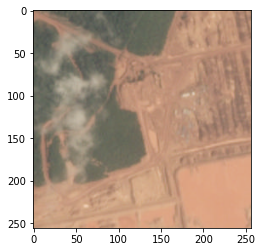

In [94]:
name = 'train_24.jpg'
path = '/content/planet/planet/planet/train-jpg/{}'.format(name)
img = io.imread(path)
plt.imshow(img)
print(img.shape)

In [95]:
train_cls[train_cls['image_name'] == 'train_20']
train_cls.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


# one hot encoding on labels from train class

In [97]:

for tag in labels:
    train_cls1[tag] = train_cls1['tags'].apply(lambda x: 1 if tag in x.split() else 0)
    
#.jpg added to column image_name to become same as image files

train_cls1['image_name'] = train_cls1['image_name'].apply(lambda x: '{}.jpg'.format(x))
train_cls1.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,selective_logging,blow_down,artisinal_mine,blooming
0,train_0.jpg,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1.jpg,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4.jpg,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [98]:
import tensorflow as tf

y_column = list(train_cls1.columns[2:]) # tags names as a variable
y_column

['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'selective_logging',
 'blow_down',
 'artisinal_mine',
 'blooming']

In [99]:
#fbeta scoring
def fbeta(y_true, y_pred, beta = 2, epsilon = 1e-4):
    
    beta_sqr = beta**2
    
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.5)), tf.float32)
    
    tpos = tf.reduce_sum(y_true * y_pred, axis = 1)
    fpos = tf.reduce_sum(y_pred, axis = 1) - tpos
    fneg = tf.reduce_sum(y_true, axis = 1) - tpos
    
    precision = tpos/(tpos+fpos+epsilon)
    recall = tpos/(tpos+fneg+epsilon)
    
    fb = (1+beta_sqr)*precision*recall / (beta_sqr*precision+recall+epsilon)
    return fb

In [100]:
# func for accuracy ( multi_label classification)
def multi_label_acc(y_true, y_pred, epsilon = 1e-4):
    
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.5)), tf.float32)
    
    tp = tf.reduce_sum(y_true * y_pred, axis = 1)
    fp = tf.reduce_sum(y_pred, axis = 1) - tp
    fn = tf.reduce_sum(y_true, axis = 1) - tp
    
    y_true = tf.cast(y_true, tf.bool)
    y_pred = tf.cast(y_pred, tf.bool)
        
    tn = tf.reduce_sum(tf.cast(tf.logical_not(y_true), tf.float32) * tf.cast(tf.logical_not(y_pred), tf.float32), 
                       axis = 1)
    return (tp+tn)/(tp+tn+fp+fn+epsilon)

In [101]:
#importing tensorflow to train data 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [102]:
# model
def build_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(128, 128, 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(17, activation='sigmoid'))

    opt = Adam(lr=1e-4)

    model.compile(loss='binary_crossentropy',
              
              optimizer=opt,
              metrics=[multi_label_acc, fbeta])

    return model

In [103]:
#modelcheckpoint is set to monitor the model using validation fbeta score and save the best only
# modelcheckpoint created for saving best model only using validation fbeta score 
save_best_check_point = ModelCheckpoint(filepath = '/content/best_model.hdf5', monitor = 'val_fbeta', mode = 'max',
                                       save_best_only = True, save_weights_only = True)

In [104]:
# imagedatagenerator with a validation split of 0.2
train_image_gen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)

#creating train data generator as 80% of the train dataset
#this has both feature and target
train_generator = train_image_gen.flow_from_dataframe(dataframe=train_cls1,
                                                directory ="/content/planet/planet/planet/train-jpg",  
                                                x_col="image_name", y_col=y_column, subset="training", 
                                                batch_size=16,seed=2021, shuffle=True, 
                                                class_mode="raw", target_size=(128,128))

#validation data as 20% of train dataset (validation spit = 0.2)

val_generator = train_image_gen.flow_from_dataframe(dataframe=train_cls1,
                                                directory ="/content/planet/planet/planet/train-jpg",  
                                                x_col="image_name", y_col=y_column, subset="validation", 
                                                batch_size=16,seed=2021, shuffle=True, 
                                                class_mode="raw", target_size=(128,128))

Found 32384 validated image filenames.
Found 8095 validated image filenames.


In [105]:
# training and validation image data- creating step size 
step_train_size = int(np.ceil(train_generator.samples / train_generator.batch_size))
step_val_size = int(np.ceil(val_generator.samples / val_generator.batch_size))

In [106]:
# model initialized
model1 = build_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [107]:
# summary of model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        1

In [109]:
#fitting our model using the parameters already defined 
model1.fit(x = train_generator, steps_per_epoch = step_train_size, validation_data = val_generator, 
           validation_steps = step_val_size,epochs = 5, 
           callbacks = [save_best_check_point])

Epoch 1/5
2024/2024 [==============================] - 201s 99ms/step - loss: 0.1977 - multi_label_acc: 0.9235 - fbeta: 0.7297 - val_loss: 0.1594 - val_multi_label_acc: 0.9382 - val_fbeta: 0.7894
Epoch 2/5
2024/2024 [==============================] - 189s 94ms/step - loss: 0.1586 - multi_label_acc: 0.9372 - fbeta: 0.7921 - val_loss: 0.1436 - val_multi_label_acc: 0.9425 - val_fbeta: 0.8178
Epoch 3/5
2024/2024 [==============================] - 190s 94ms/step - loss: 0.1448 - multi_label_acc: 0.9422 - fbeta: 0.8129 - val_loss: 0.1327 - val_multi_label_acc: 0.9470 - val_fbeta: 0.8257
Epoch 4/5
2024/2024 [==============================] - 212s 105ms/step - loss: 0.1366 - multi_label_acc: 0.9457 - fbeta: 0.8268 - val_loss: 0.1275 - val_multi_label_acc: 0.9491 - val_fbeta: 0.8323
Epoch 5/5
2024/2024 [==============================] - 204s 101ms/step - loss: 0.1301 - multi_label_acc: 0.9486 - fbeta: 0.8376 - val_loss: 0.1226 - val_multi_label_acc: 0.9515 - val_fbeta: 0.8428


In [110]:
# another model to make predictions
model2 = build_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [112]:
# same as training adding .jpg extension to image present in sample submission file

##adding .jpg extension to image name in the sample submission file
sample_sub = pd.read_csv('/content/planet/planet/planet/sample_submission.csv')
sample_sub1 = sample_sub.copy()
sample_sub1['image_name'] = sample_sub1['image_name'].apply(lambda x: '{}.jpg'.format(x))
sample_sub1.head()

,image_name,tags
0,test_0.jpg,primary clear agriculture road water
1,test_1.jpg,primary clear agriculture road water
2,test_2.jpg,primary clear agriculture road water
3,test_3.jpg,primary clear agriculture road water
4,test_4.jpg,primary clear agriculture road water


In [113]:
# laoding weight of prediction model 
model2.load_weights('best_model.hdf5')

In [114]:
# dividing sample submission file in two splits

test1_df = sample_sub1.iloc[:40669]['image_name'].reset_index().drop('index', axis =1)
test1_df.head()

,image_name
0,test_0.jpg
1,test_1.jpg
2,test_2.jpg
3,test_3.jpg
4,test_4.jpg


In [117]:
#initializing imagedatagenerator - testimages
 
# also rescaling 
test_image_gen = ImageDataGenerator(rescale = 1/255)


#generator creation for first test images 

test_generator1 = test_image_gen.flow_from_dataframe(dataframe=test1_df, 
                                                directory="/content/planet/planet/planet/test-jpg", 
                                                x_col="image_name", y_col=None, batch_size=16, 
                                                shuffle=False, class_mode=None, target_size=(128,128))

step_test_size1 = int(np.ceil(test_generator1.samples/test_generator1.batch_size))

Found 40669 validated image filenames.


In [118]:
# resetting test generator to avoid shuffling

test_generator1.reset()
pred1 = model2.predict(test_generator1, steps = step_test_size1, verbose = 1)

2542/2542 [==============================] - 154s 60ms/step


In [119]:
# in the generator to get the filenames using .filenames as attribute
file_names1 = test_generator1.filenames

#convert predicted values to dataframe with joining two labels together  when occurance probability > 0.5 

pred_tags1 = pd.DataFrame(pred1)
pred_tags1 = pred_tags1.apply(lambda x: ' '.join(np.array(labels)[x>0.5]), axis = 1)


result1 = pd.DataFrame({'image_name': file_names1, 'tags': pred_tags1})
result1.head()

,image_name,tags
0,test_0.jpg,haze clear
1,test_1.jpg,haze clear
2,test_2.jpg,haze road
3,test_3.jpg,haze clear
4,test_4.jpg,haze road


In [120]:
#second batch 
test2_df = sample_sub1.iloc[40669:]['image_name'].reset_index().drop('index', axis =1)
test2_df.head()

,image_name
0,file_0.jpg
1,file_1.jpg
2,file_10.jpg
3,file_100.jpg
4,file_1000.jpg


In [121]:
#creating a generator for the second batch of test image files
test_generator2 = test_image_gen.flow_from_dataframe(dataframe=test2_df, 
                                                directory="/content/planet/test-jpg-additional/test-jpg-additional", 
                                                x_col="image_name", y_col=None, batch_size=16, 
                                                shuffle=False, class_mode=None, target_size=(128,128))

step_test_size2 = int(np.ceil(test_generator2.samples/test_generator2.batch_size))

Found 20522 validated image filenames.


In [122]:
#we reset the generator to avoid shuffling, then make prediction on the generator
test_generator2.reset()
pred2 = model2.predict(test_generator2, steps = step_test_size2, verbose = 1)

1283/1283 [==============================] - 83s 65ms/step


In [123]:
# in the generator to get the filenames using .filenames as attribute
file_names2 = test_generator2.filenames

#convert predicted values to dataframe with joining two labels together  when occurance probability > 0.5 
pred_tags2 = pd.DataFrame(pred2)
pred_tags2 = pred_tags2.apply(lambda x: ''.join(np.array(labels)[x>0.5]), axis = 1)


result2 = pd.DataFrame({'image_name': file_names2, 'tags': pred_tags2})
result2.head()

,image_name,tags
0,file_0.jpg,hazeclear
1,file_1.jpg,hazeslash_burnroad
2,file_10.jpg,hazeslash_burnselective_logging
3,file_100.jpg,hazeclear
4,file_1000.jpg,hazeclear


In [124]:
#merging result1 and resul2 without shuffliung the index

last_result = pd.concat([result1, result2])

last_result = last_result.reset_index().drop('index', axis =1)

print(last_result.shape)

#final result
last_result.head()

(61191, 2)


,image_name,tags
0,test_0.jpg,haze clear
1,test_1.jpg,haze clear
2,test_2.jpg,haze road
3,test_3.jpg,haze clear
4,test_4.jpg,haze road


In [125]:
#removing the .jpg extension to match as original case

last_result['image_name'] = last_result['image_name'].apply(lambda x: x[:-4])
last_result.head()

,image_name,tags
0,test_0,haze clear
1,test_1,haze clear
2,test_2,haze road
3,test_3,haze clear
4,test_4,haze road


In [126]:
# setting result to csv file 

last_result.to_csv('amansubmission.csv', index = False)

In [128]:
! kaggle competitions submit planet-understanding-the-amazon-from-space -f /content/amansubmission.csv -m "first Aman  submission"

100% 1.64M/1.64M [00:01<00:00, 1.48MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space